# 03 - Display Well Log with Lithology

Author: Promise Ekeh

Date: May 2021

This the 3rd notebook in the series Lithology Prediction With Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Load Data

In [2]:
data = pd.read_csv("../data/train.csv", sep=';')

In [10]:
df=data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY'}).copy()

df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [11]:
wells = list(df['WELL'].unique())
well_data=df[df['WELL']==wells[0]]
well_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,8.585064,...,1.524012,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0
18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,8.142556,...,2.056166,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0
18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,7.933336,...,2.909438,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0
18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,7.837981,...,2.909438,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0


In [12]:
use_col= ['WELL', 'DEPTH_MD', 'Z_LOC', 'CALI', 'GR','RSHA', 'RMED', 'RDEP',  'RHOB',  'NPHI', 'LITHOLOGY']
well_data=well_data[use_col]
well_data

,WELL,DEPTH_MD,Z_LOC,CALI,GR,RSHA,RMED,RDEP,RHOB,NPHI,LITHOLOGY
0,15/9-13,494.528,-469.501831,19.480835,80.200851,NaN,1.611410,1.798681,1.884186,NaN,65000
1,15/9-13,494.680,-469.653809,19.468800,79.262886,NaN,1.618070,1.795641,1.889794,NaN,65000
2,15/9-13,494.832,-469.805786,19.468800,74.821999,NaN,1.626459,1.800733,1.896523,NaN,65000
3,15/9-13,494.984,-469.957794,19.459282,72.878922,NaN,1.621594,1.801517,1.891913,NaN,65000
4,15/9-13,495.136,-470.109772,19.453100,71.729141,NaN,1.602679,1.795299,1.880034,NaN,65000
...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,-3245.549316,8.541623,19.418915,NaN,8.585064,8.065685,2.630211,0.187811,74000
18266,15/9-13,3271.568,-3245.700928,8.557213,21.444370,NaN,8.142556,8.205255,2.643114,0.185574,74000
18267,15/9-13,3271.720,-3245.852539,8.577917,22.646879,NaN,7.933336,8.249817,2.681300,0.176074,74000
18268,15/9-13,3271.872,-3246.004395,8.478219,22.253584,NaN,7.837981,8.303959,2.738337,0.174617,74000


In [6]:
well_data.LITHOLOGY.unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000],
      dtype=int64)

# Lithology 

The Lithology is given in lith codes, we can create a dictionary of dictionary for the codes names, color and pattern we want for each lithology

In [13]:
lithology_numbers = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'yellow'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'grey'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'++', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'o', 'color':'white'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'pink'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'*', 'color':'#ef138a'}}

In [14]:
# Visualise the dictionary to see how it looks
lithology_df = pd.DataFrame.from_dict(lithology_numbers, orient='index')
lithology_df

,lith,lith_num,hatch,color
30000,Sandstone,1,..,yellow
65030,Sandstone/Shale,2,-.,#ffe119
65000,Shale,3,--,grey
80000,Marl,4,,#7cfc00
74000,Dolomite,5,-/,#8080ff
70000,Limestone,6,++,#80ffff
70032,Chalk,7,o,white
88000,Halite,8,x,#7ddfbe
86000,Anhydrite,9,,pink
99000,Tuff,10,||,#ff8c00


## Plot lithology legend

lets visualise how these lithology will look with the color and pattern

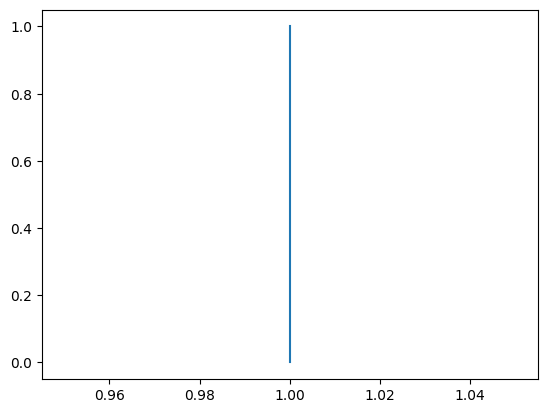

In [12]:
# create x and y
y = [0, 1]
x = [1, 1]

plt.plot(x, y)

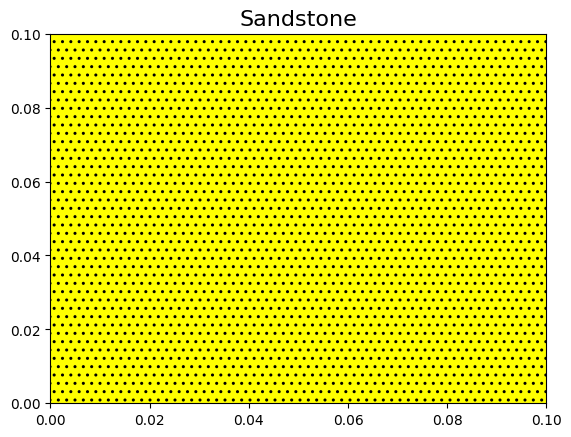

In [22]:
# Visualise Lith 3000: Sandstone 
plt.plot(x, y,)
plt.xlim(0,0.1)
plt.ylim(0,0.1)
plt.title(str(lithology_numbers[30000]['lith']), fontsize=16)
plt.fill_betweenx(y, 0, 0.1, facecolor=lithology_numbers[30000]['color'], hatch=lithology_numbers[30000]['hatch'])

we can now create fig with subplots to visualise all the lithology

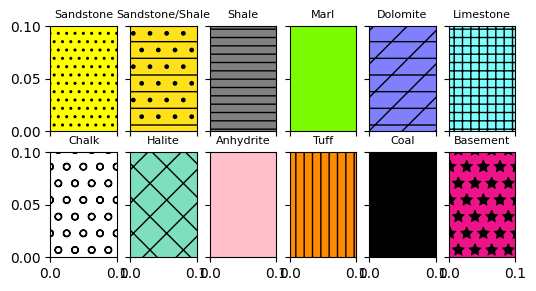

In [27]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=6,nrows=2, sharex=True, sharey=True, figsize=(6, 3))
for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 0.1)
    ax.set_title(str(lithology_numbers[key]['lith']), fontsize=8)
    ax.fill_betweenx(y, 0, 0.1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])


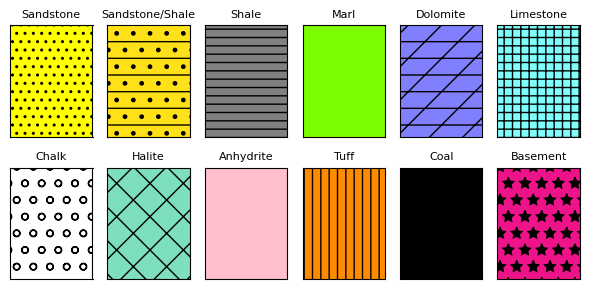

In [29]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=6,nrows=2, sharex=True, sharey=True, figsize=(6, 3))
for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 0.1)
    ax.set_title(str(lithology_numbers[key]['lith']), fontsize=8)
    ax.fill_betweenx(y, 0, 0.1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

plt.tight_layout()

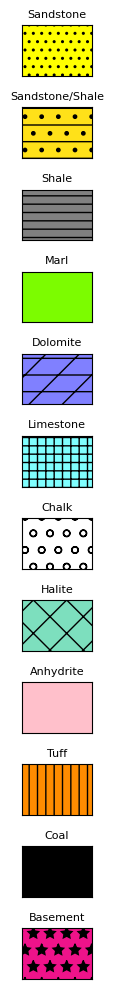

In [30]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=1,nrows=12, sharex=True, sharey=True, figsize=(1, 10))
for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 0.1)
    ax.set_title(str(lithology_numbers[key]['lith']), fontsize=8)
    ax.fill_betweenx(y, 0, 0.1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

plt.tight_layout()
                         

## Plot Lithology Track

Create a plot of lithology with depth using the legend above

[]

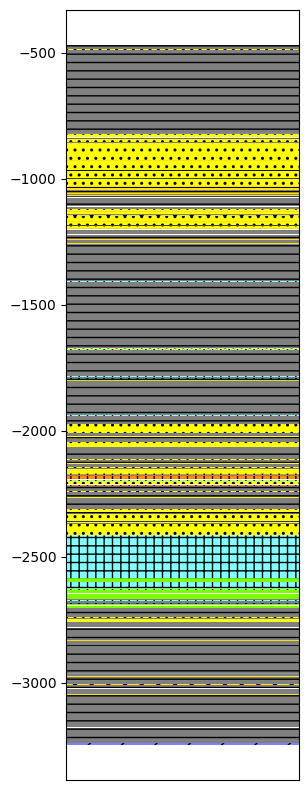

In [31]:
fig, ax = plt.subplots(figsize=(3,10))
for key in lithology_numbers.keys():
    color = lithology_numbers[key]['color']
    hatch = lithology_numbers[key]['hatch']
    ax.fill_betweenx(well_data['Z_LOC'], 0, well_data['LITHOLOGY'], where=(well_data['LITHOLOGY']==key),
                     facecolor=color, hatch=hatch)

ax.set_xlim([0, 1])
ax.axes.get_xaxis().set_ticks([])


In [123]:
# def plot_legend ():
#     y = [0, 1]
#     x = [1, 1]
    
#     fig, axes = plt.subplots(ncols=1,nrows=12, sharex=True, sharey=True, figsize=(1, 6))
#     for ax, key in zip(axes.flat, lithology_numbers.keys()):
#         ax.plot(x, y)
#         ax.set_xlim(0, 0.1)
#         ax.set_ylim(0, 0.1)
#         ax.set_title(str(lithology_numbers[key]['lith']), fontsize=8)
#         ax.fill_betweenx(y, 0, 0.1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
#         ax.axes.get_xaxis().set_ticks([])
#         ax.axes.get_yaxis().set_ticks([])
    
#     # plt.tight_layout()
#     # return fig
                         

# Functions

In [15]:
def plot_legend(ax):
    y = [0, 1]
    x = [1, 1]
    
    axes = [ax.inset_axes([0, i / 12, 1, 1 / 12]) for i in range(12)]
    for ax, key in zip(axes, lithology_numbers.keys()):
        ax.plot(x, y)
        ax.set_xlim(0, 0.1)
        ax.set_ylim(0, 0.1)
        # ax.set_title(str(lithology_numbers[key]['lith']), fontsize=8)
        ax.fill_betweenx(y, 0, 0.1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
        ax.set_xticks([])  # Turn off x-axis ticks
        ax.set_yticks([])  # Turn off y-axis ticks
        ax.set_xticklabels([])  # Turn off x-axis tick labels
        ax.set_yticklabels([])  # Turn off y-axis tick labels
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        # ax.set_title('Legend')
     
        
        
        # Add the label to the right side
        ax.annotate(str(lithology_numbers[key]['lith']), xy=(1.1, 0.5), xycoords='axes fraction',
                    fontsize=8, ha='left', va='center', rotation=90)

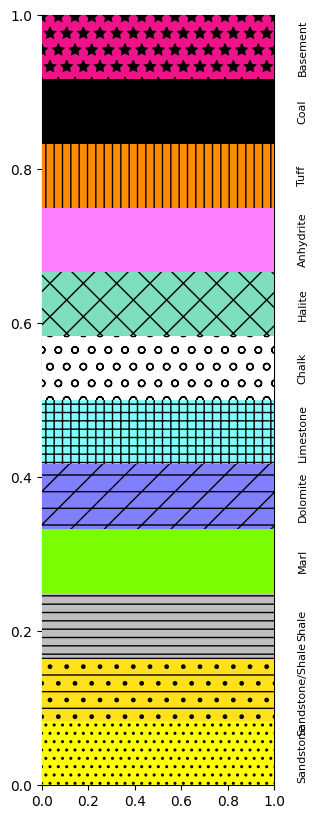

In [228]:
fig, ax=plt.subplots(figsize=(3,10))
plot_legend(ax)

In [16]:
def plot_lithology (well_data, ax, ax1):
    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax.fill_betweenx(well_data['Z_LOC'], 0, well_data['LITHOLOGY'], where=(well_data['LITHOLOGY']==key),
                         facecolor=color, hatch=hatch)

    ax.set_xlim([0, 1])
    plot_legend(ax1)
    ax.axes.get_xaxis().set_ticks([])
    ax1.axes.get_xaxis().set_ticks([])


# Plot Lithology with legend

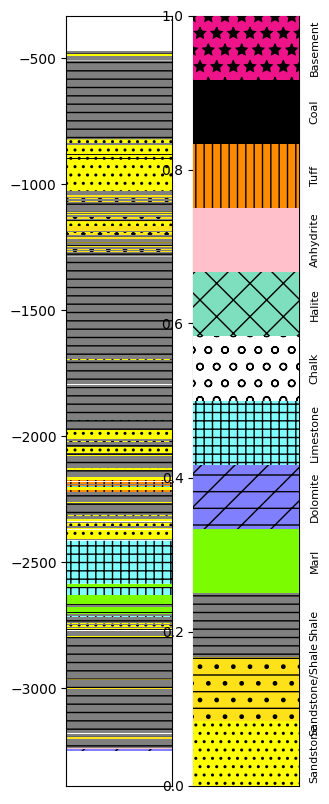

In [17]:
fig, (ax, ax1) =plt.subplots(1, 2, figsize=(3,10))
plot_lithology(well_data, ax, ax1)

# plot all curve

In [18]:
def plot_5_curve_lith (well_data, ylim=False):
    well_name= ','.join(well_data['WELL'].unique())
    # fig, (ax0, ax1, ax3, ax5, ax6) = plt.subplots(nrows=1, ncols=5, figsize=(9,10), sharey=True, width_ratios=[3, 3, 3, 1.4, 0.6])
    fig, (ax0, ax1, ax3, ax5, ax6) = plt.subplots(nrows=1, ncols=5, figsize=(12.8,7.2), sharey=True, width_ratios=[3, 3, 3, 1.4, 0.6])
    
    ax2=ax1.twiny()
    ax4=ax3.twiny()
    
    # first track Gamma
    ax0.plot('GR', 'Z_LOC', data=well_data, color='green', linewidth=0.5)
    ax0.set_xlim(0, 200)
    ax0.tick_params(axis='x', colors='green')
    ax0.set_xlabel('GR')
    
    # 2nd Track Restivity
    ax1.plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)
    ax1.spines["top"].set_position(("axes", 1.07)) 
    ax1.tick_params(axis='x', colors='red')
    ax1.set_xlabel('RDEP')
    ax1.spines["top"].set_edgecolor("red")
    ax1.xaxis.label.set_color("red")
    
    
    ax2.plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)
    ax2.tick_params(axis='x', colors='blue')
    ax2.set_xlabel('RMED')
    ax2.xaxis.label.set_color("blue")
    ax2.spines["top"].set_edgecolor("blue")
    
    for x in [ax1, ax2]:
        x.set_xscale("log")
        x.set_xlim(0.2, 2000)
        
        
    # 3rd track Neutron density
    ax3.plot("RHOB", "Z_LOC", data= well_data, color='teal', linewidth=0.5)
    ax3.spines["top"].set_position(("axes", 1.06)) #start with 1.02
    # ax.set_xlim(0.2, 2000)
    ax3.tick_params(axis='x', colors='teal')
    ax3.set_xlabel('RHOB')
    ax3.xaxis.set_label_position('top') 
    ax3.spines["top"].set_edgecolor("teal")
    ax3.xaxis.label.set_color("teal")
    
    
    ax4.plot("NPHI", "Z_LOC", data= well_data, color='black', linewidth=0.5, linestyle='dashed')
    ax4.tick_params(axis='x', colors='black')
    ax4.set_xlabel('NPHI')
    ax4.xaxis.label.set_color("black")
    ax4.spines["top"].set_edgecolor("black")
    ax4.invert_xaxis()

    plot_lithology(well_data, ax5, ax6)
    for x in [ ax6, ax5]:
        x.set_xticks([])
        x.set_xticklabels([])
        x.xaxis.set_label_position('top') 
        
    ax5.set_xlabel('LITHOLOGY')
    ax6.set_xlabel('Legend')

    fig.suptitle(well_name, fontsize=16)
    
    for x in [ax0, ax1,  ax2, ax3, ax4, ax5]:
        x.grid()
        x.xaxis.set_label_position('top') 
        x.xaxis.tick_top()

        x.set_ylim( well_data['Z_LOC'].min()-50,  well_data['Z_LOC'].max()+50)
        if ylim:
            x.set_ylim( ylim)

    # ax6.set_yticks([])
    # ax6.set_yticklabels([])

    plt.tight_layout()
    plt.show()

        

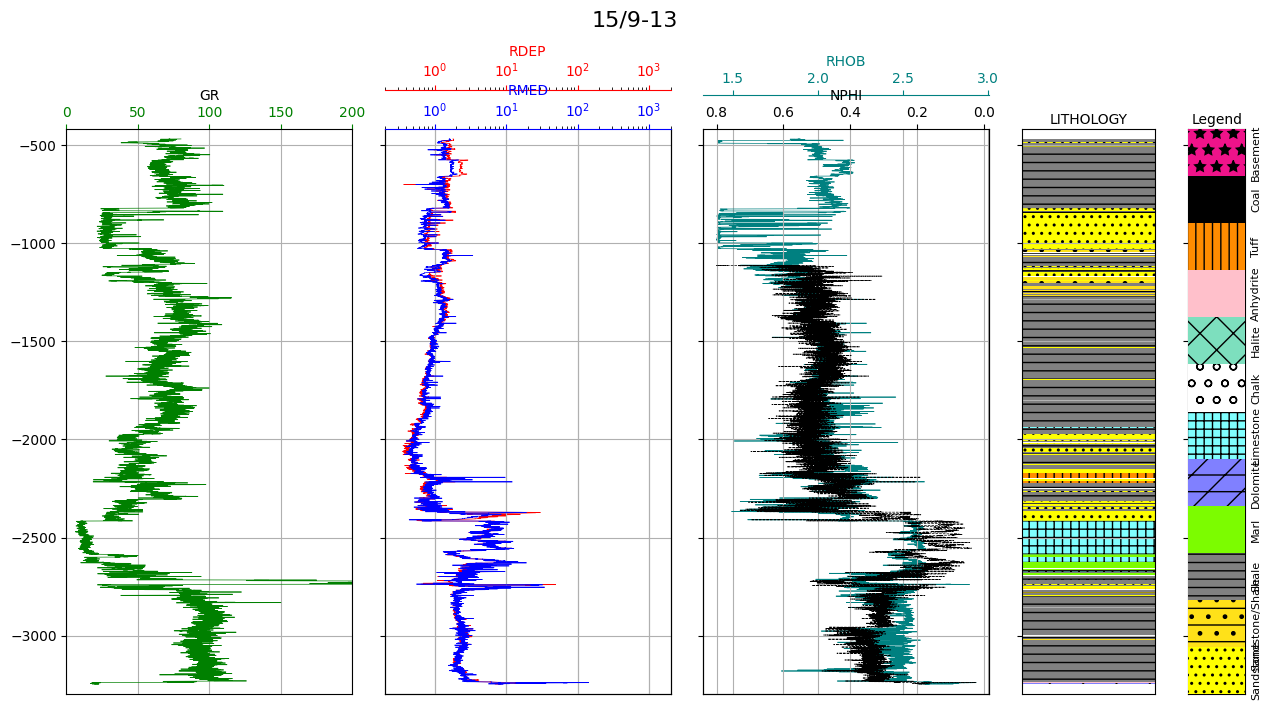

In [19]:
plot_5_curve_lith (well_data)

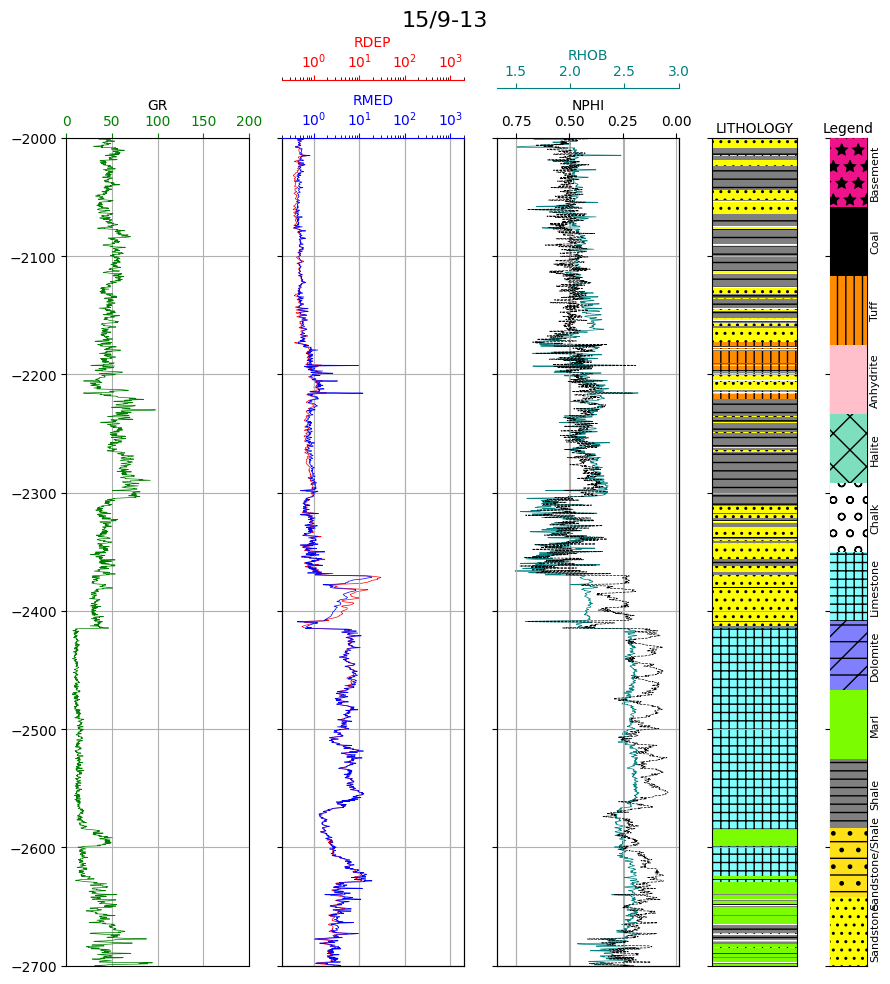

In [49]:
plot_5_curve_lith (well_data, ylim=[-2700, -2000])

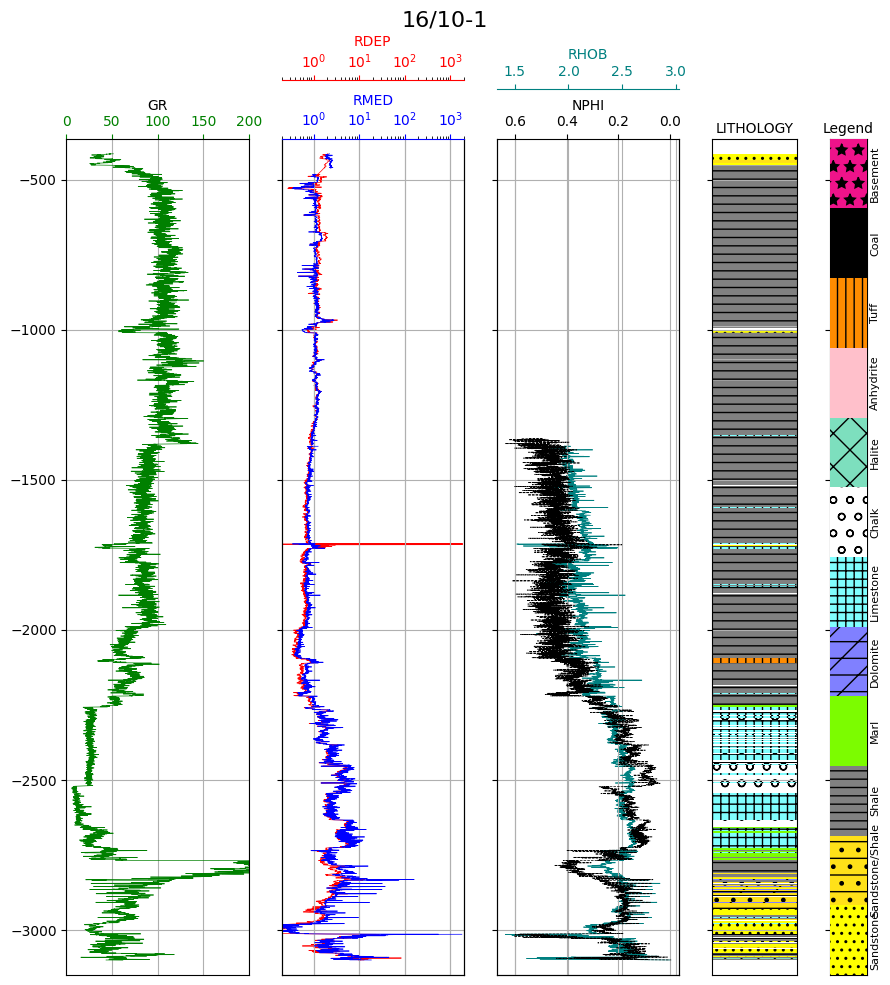

In [55]:
plot_5_curve_lith(df[df['WELL']==wells[5]])

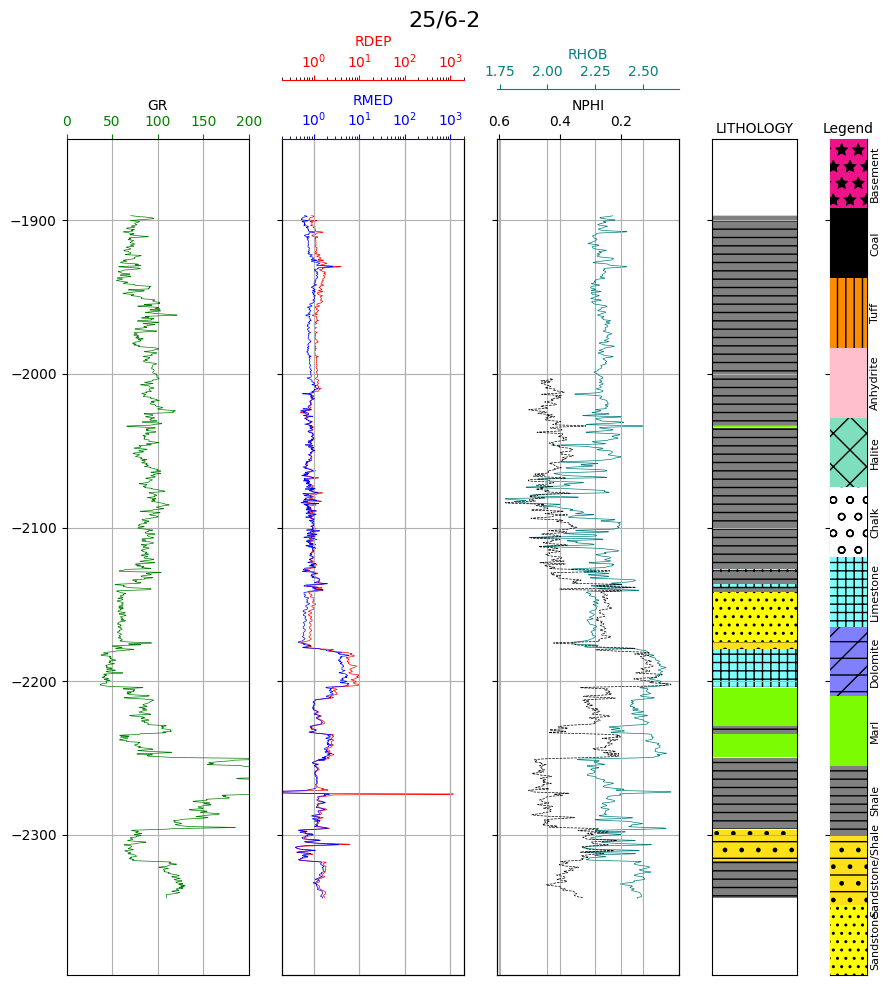

In [56]:
plot_5_curve_lith(df[df['WELL']==wells[30]])